In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Lendo e processando dados

In [26]:
dados = pd.read_csv("data/preprocessed/2017_2021.csv", low_memory=False, index_col=8)

In [28]:
funds = dados.index.unique()

In [30]:
dados = dados.drop(["CNPJ_FUNDO", "VL_TOTAL", "VL_PATRIM_LIQ", "VL_QUOTA", "NR_COTST"], axis=1)

### Captações

In [39]:
dados_capt = (
    dados
    .reset_index()
    .pivot(index="DT_COMPTC", columns="NOME_FUNDO", values="CAPTC_DIA")
    .dropna(axis = 1)
)

### Resgates

In [42]:
dados_resg = (
    dados
    .reset_index()
    .pivot(index="DT_COMPTC", columns="NOME_FUNDO", values="RESG_DIA")
    .dropna(axis = 1)
)

# Análise exploratória

## 1. Resgates

### 1.1 - Resgates totais por mês (p/ todos os fundos)

In [66]:
dados_resg["year-month"] = dados_resg.index.to_series().str[:-3]

In [73]:
resgates_somados = (
    dados_resg
    .groupby(["year-month"]).sum()
    .sum(axis=1)
    .reset_index()
    .rename({0 : "Resgate_total"}, axis=1)
)

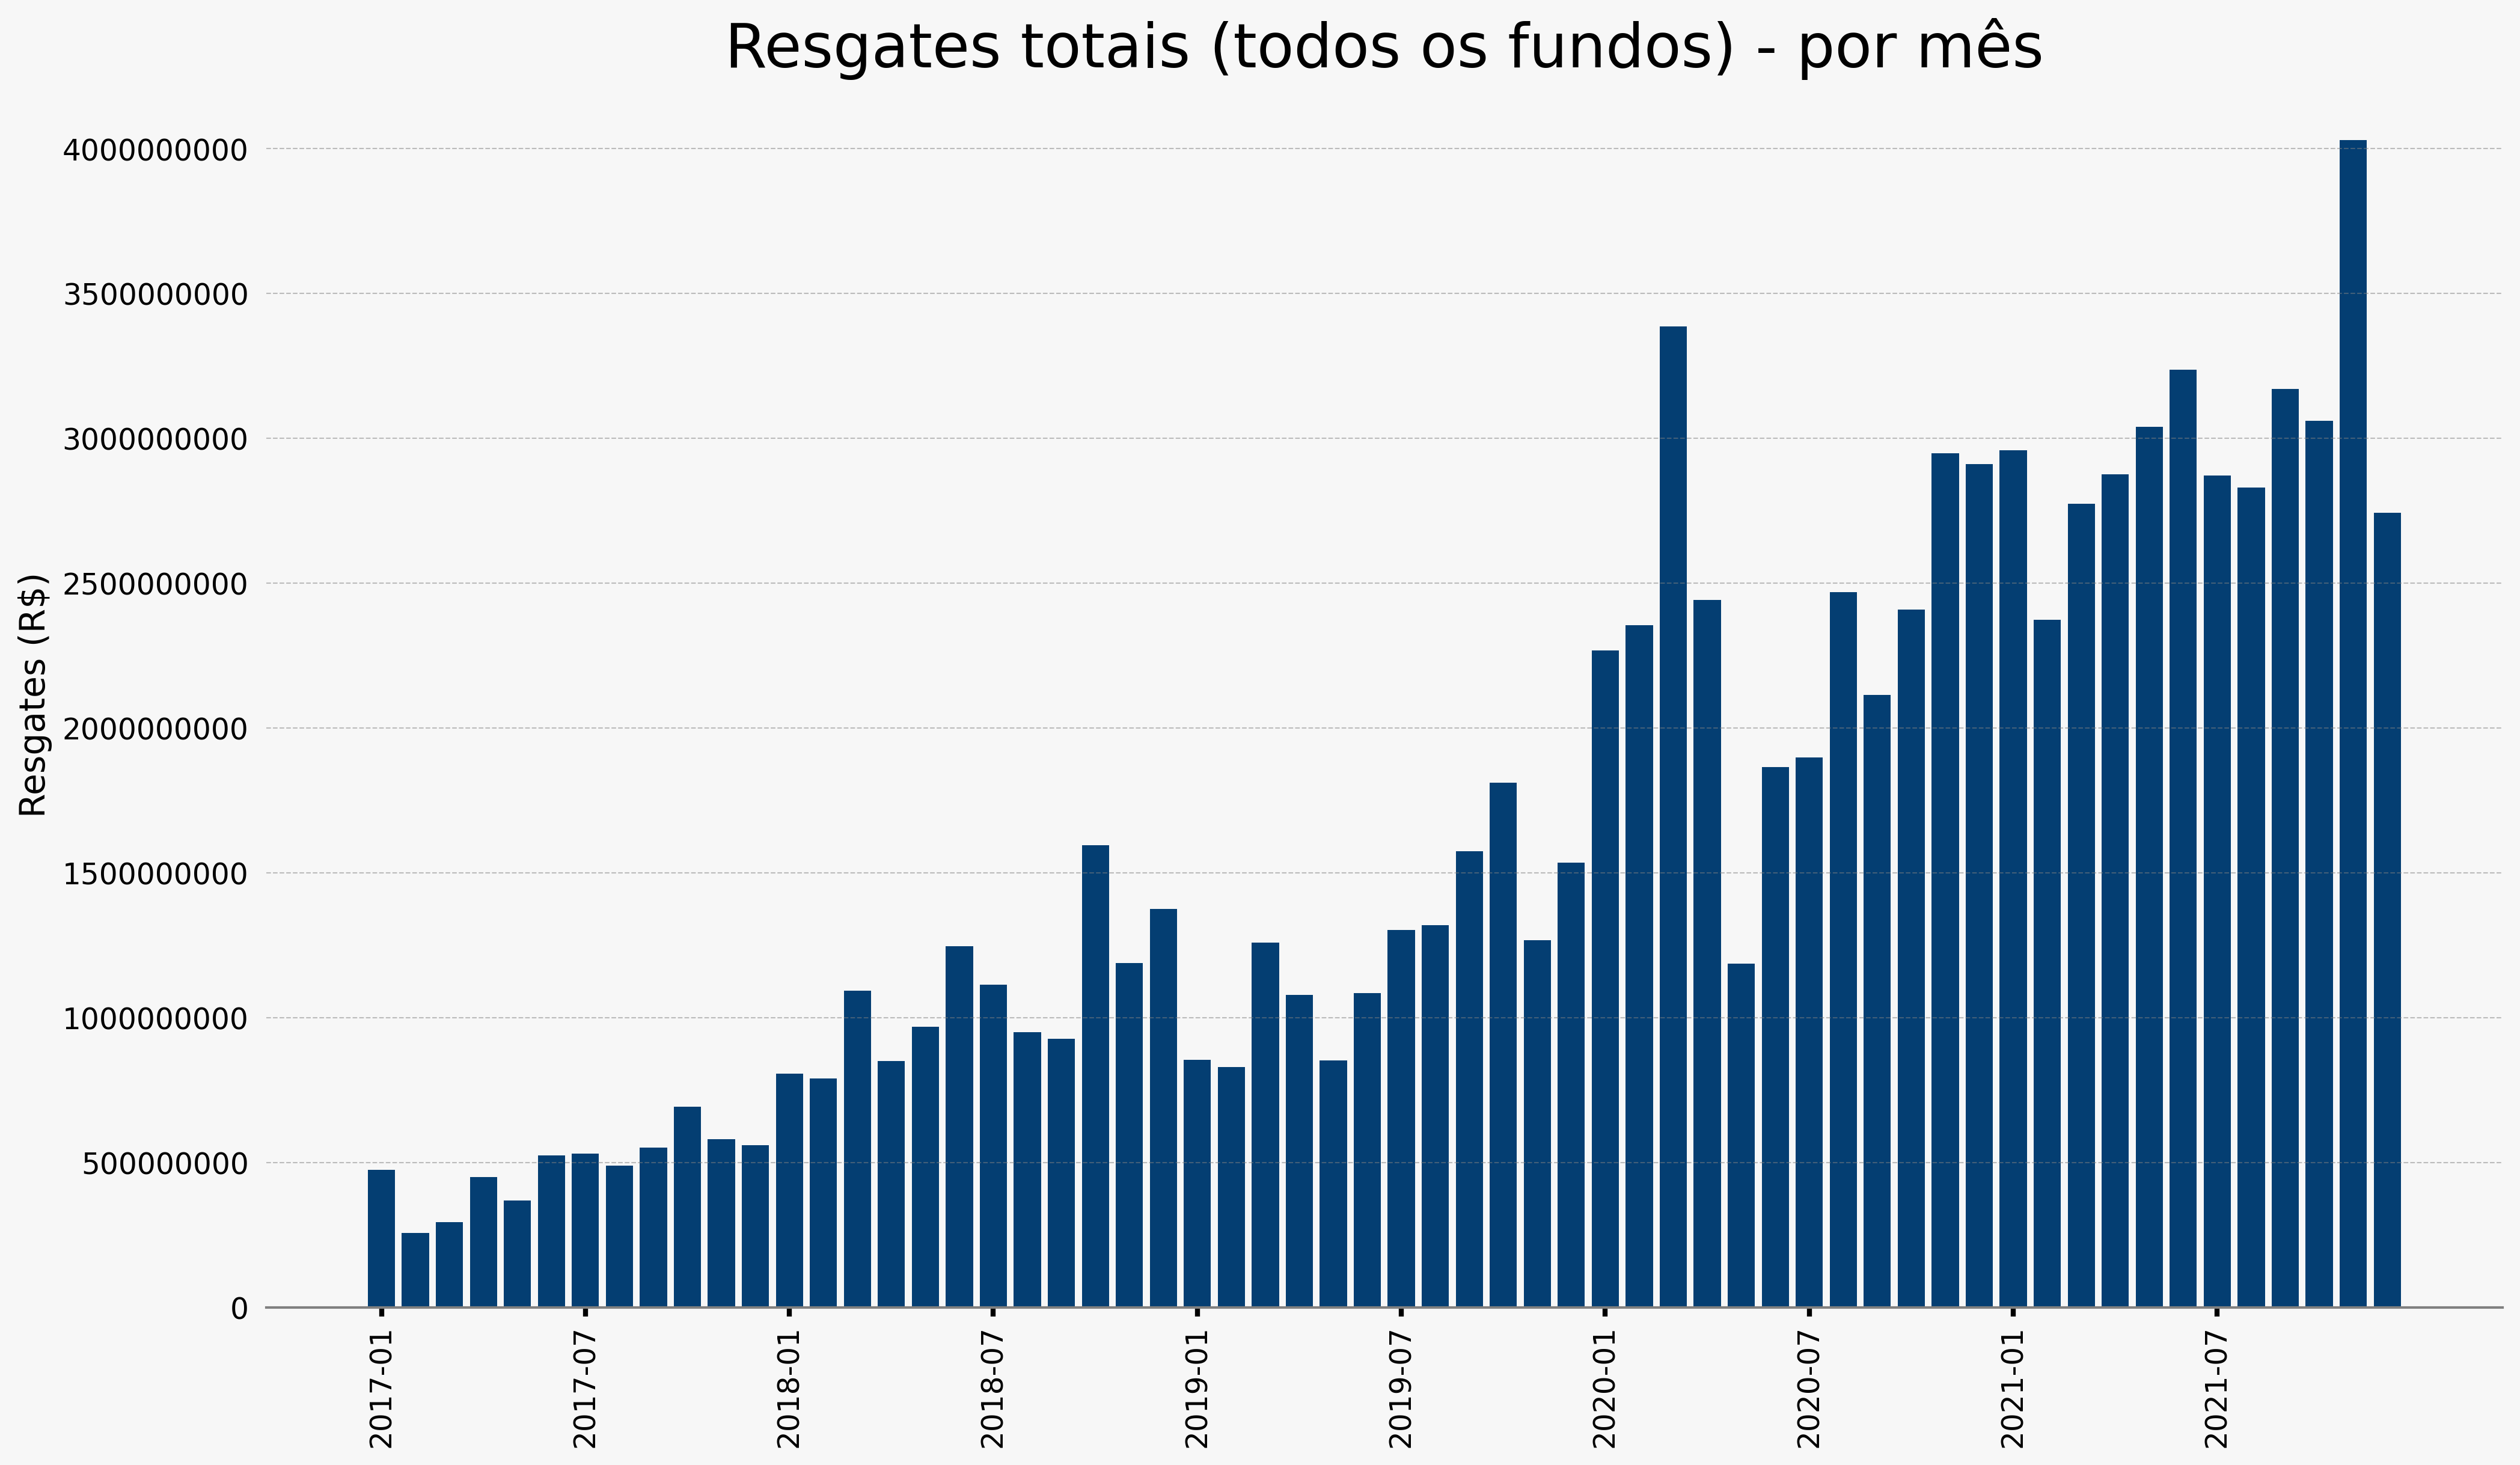

In [78]:
plt.style.use("finance_theme.mplstyle")

plt.figure(figsize=(16, 9))
plt.bar(resgates_somados["year-month"], resgates_somados["Resgate_total"])
plt.xticks(rotation = "vertical")
plt.title("Resgates totais (todos os fundos) - por mês")
plt.ylabel("Resgates (R$)")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xticks(resgates_somados["year-month"][::6])

plt.show()

### 1.2 - Fundos com mais resgates no período analisado

In [92]:
resg_periodo_porfundo = (
    dados_resg
    .drop("year-month", axis=1)
    .sum(axis=0)
    .sort_values(ascending=False)
    .reset_index()
    .rename({0 : "Resgate_total"}, axis=1)
)

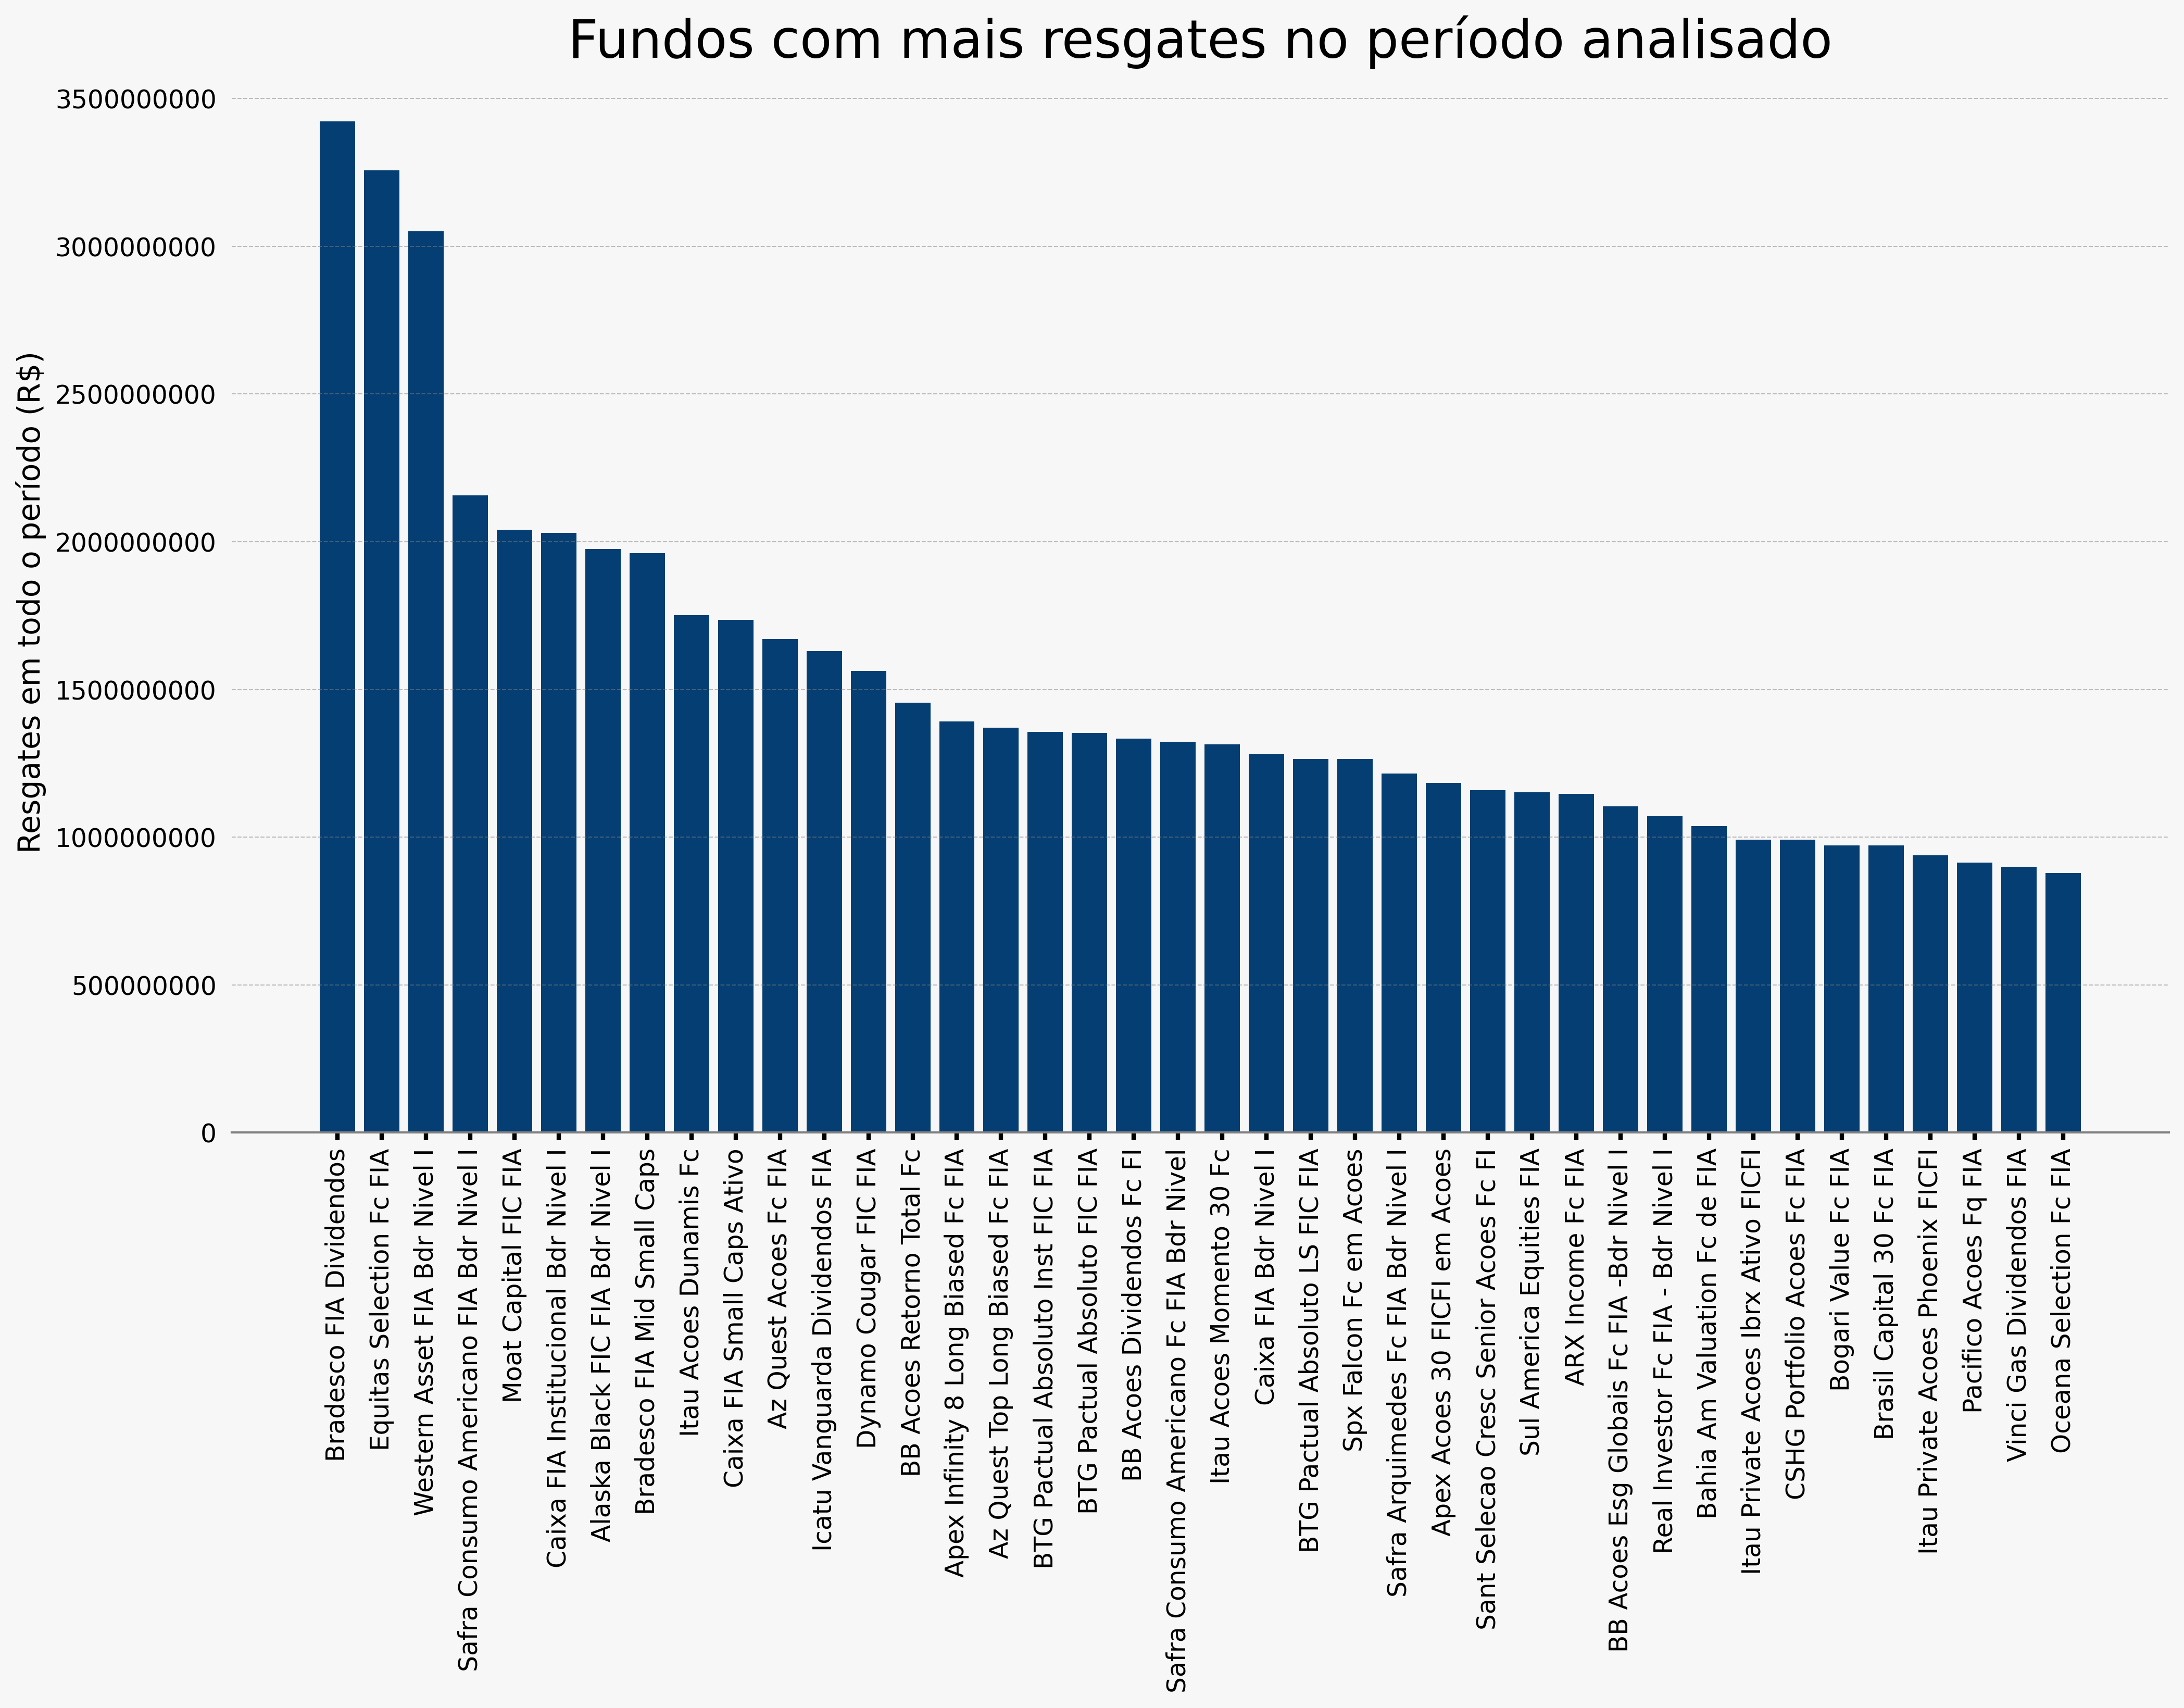

In [93]:
plt.figure(figsize=(16, 9))
plt.title("Fundos com mais resgates no período analisado")
plt.bar(resg_periodo_porfundo.iloc[:40, 0], resg_periodo_porfundo.iloc[:40, 1])
plt.xticks(rotation="vertical")
plt.ylabel("Resgates em todo o período (R$)")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()

### 1.3 - Fundos com mais e menos resgates durante o período

In [101]:
id_fundos_observar = list(range(5))+list(range(-5,0))

In [106]:
melhores_piores_resg_porfundo = (
    resg_periodo_porfundo
    .iloc[id_fundos_observar]
    .assign(Top_5=lambda x: x.index <= 4)
)

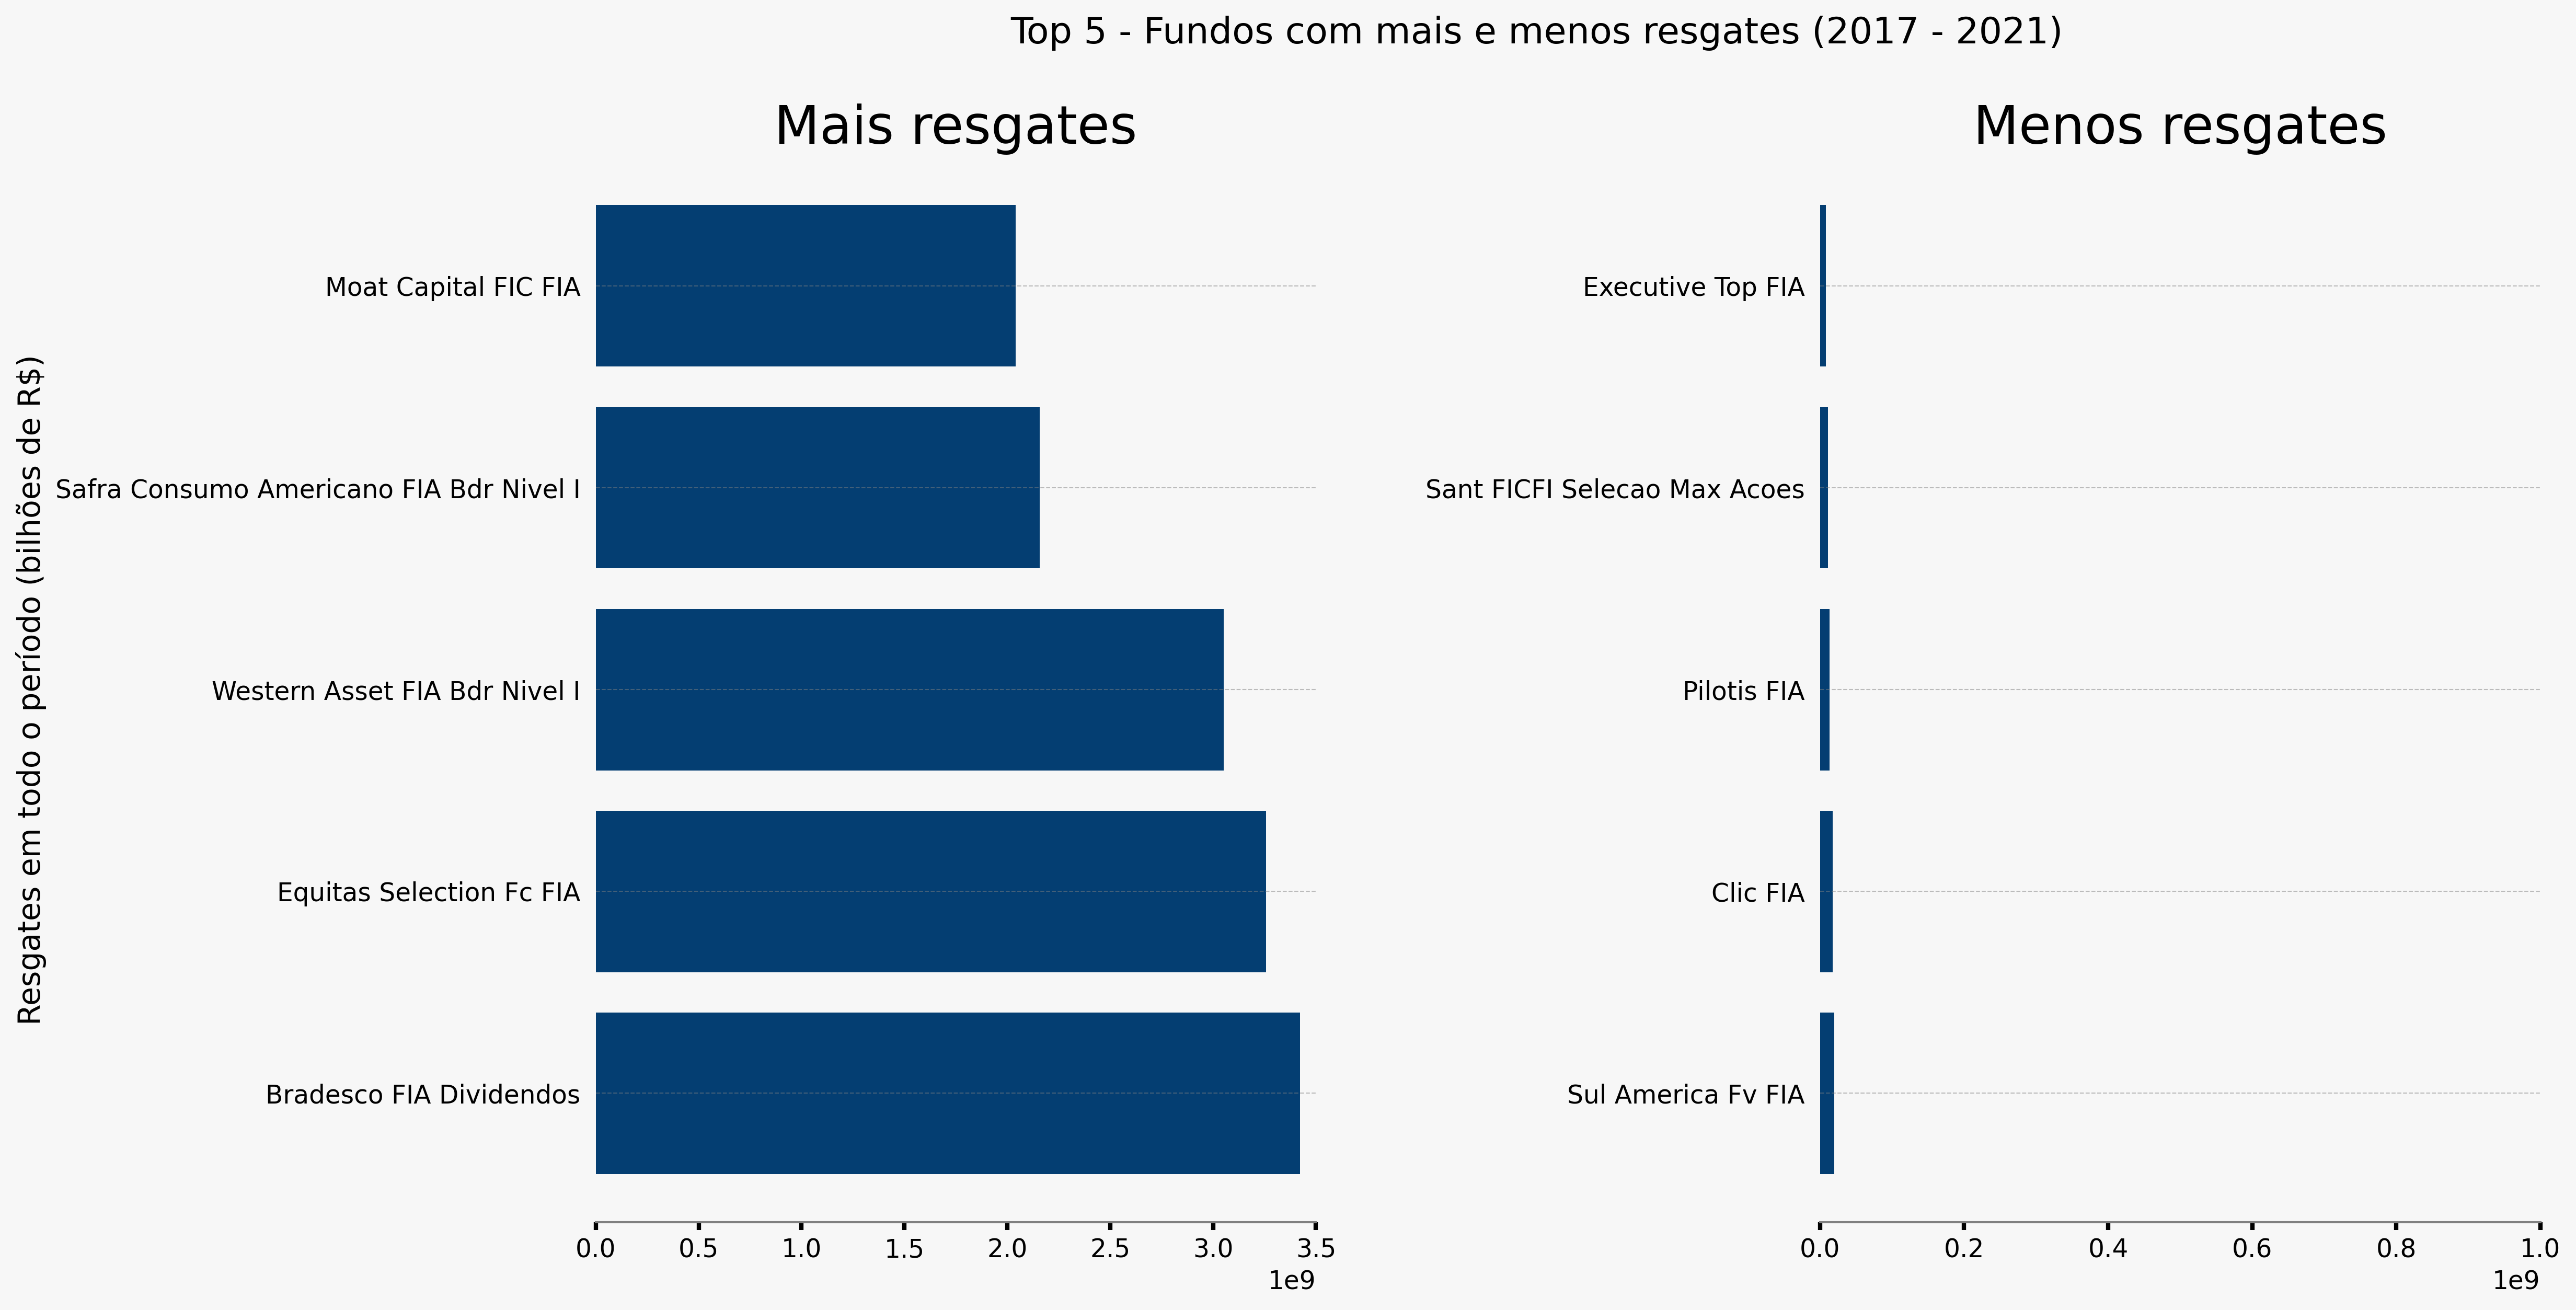

In [139]:
fig, ax = plt.subplots(figsize=(16, 9), ncols=2)
plt.subplots_adjust(wspace=.7)

fig.suptitle("Top 5 - Fundos com mais e menos resgates (2017 - 2021)")
ax[0].set_ylabel("Resgates em todo o período (bilhões de R$)")

ax[0].set_title("Mais resgates")
ax[0].barh(
    melhores_piores_resg_porfundo[melhores_piores_resg_porfundo["Top_5"]]["NOME_FUNDO"],
    melhores_piores_resg_porfundo[melhores_piores_resg_porfundo["Top_5"]]["Resgate_total"]
)
ax[0].set_xlim(0, 3.5 * (10**9))

ax[1].set_title("Menos resgates")
ax[1].barh(
    melhores_piores_resg_porfundo[~melhores_piores_resg_porfundo["Top_5"]]["NOME_FUNDO"],
    melhores_piores_resg_porfundo[~melhores_piores_resg_porfundo["Top_5"]]["Resgate_total"]
)
ax[1].set_xlim(0, 1 * (10**9))

plt.show()

## 2. Aportes

### 2.1 - Aportes totais (todos os fundos) por mês

In [140]:
dados_capt["year-month"] = dados_capt.index.to_series().str[:-3]

capt_somados = (
    dados_capt
    .groupby(["year-month"]).sum()
    .sum(axis=1)
    .reset_index()
    .rename({0 : "Captacao_total"}, axis=1)
)

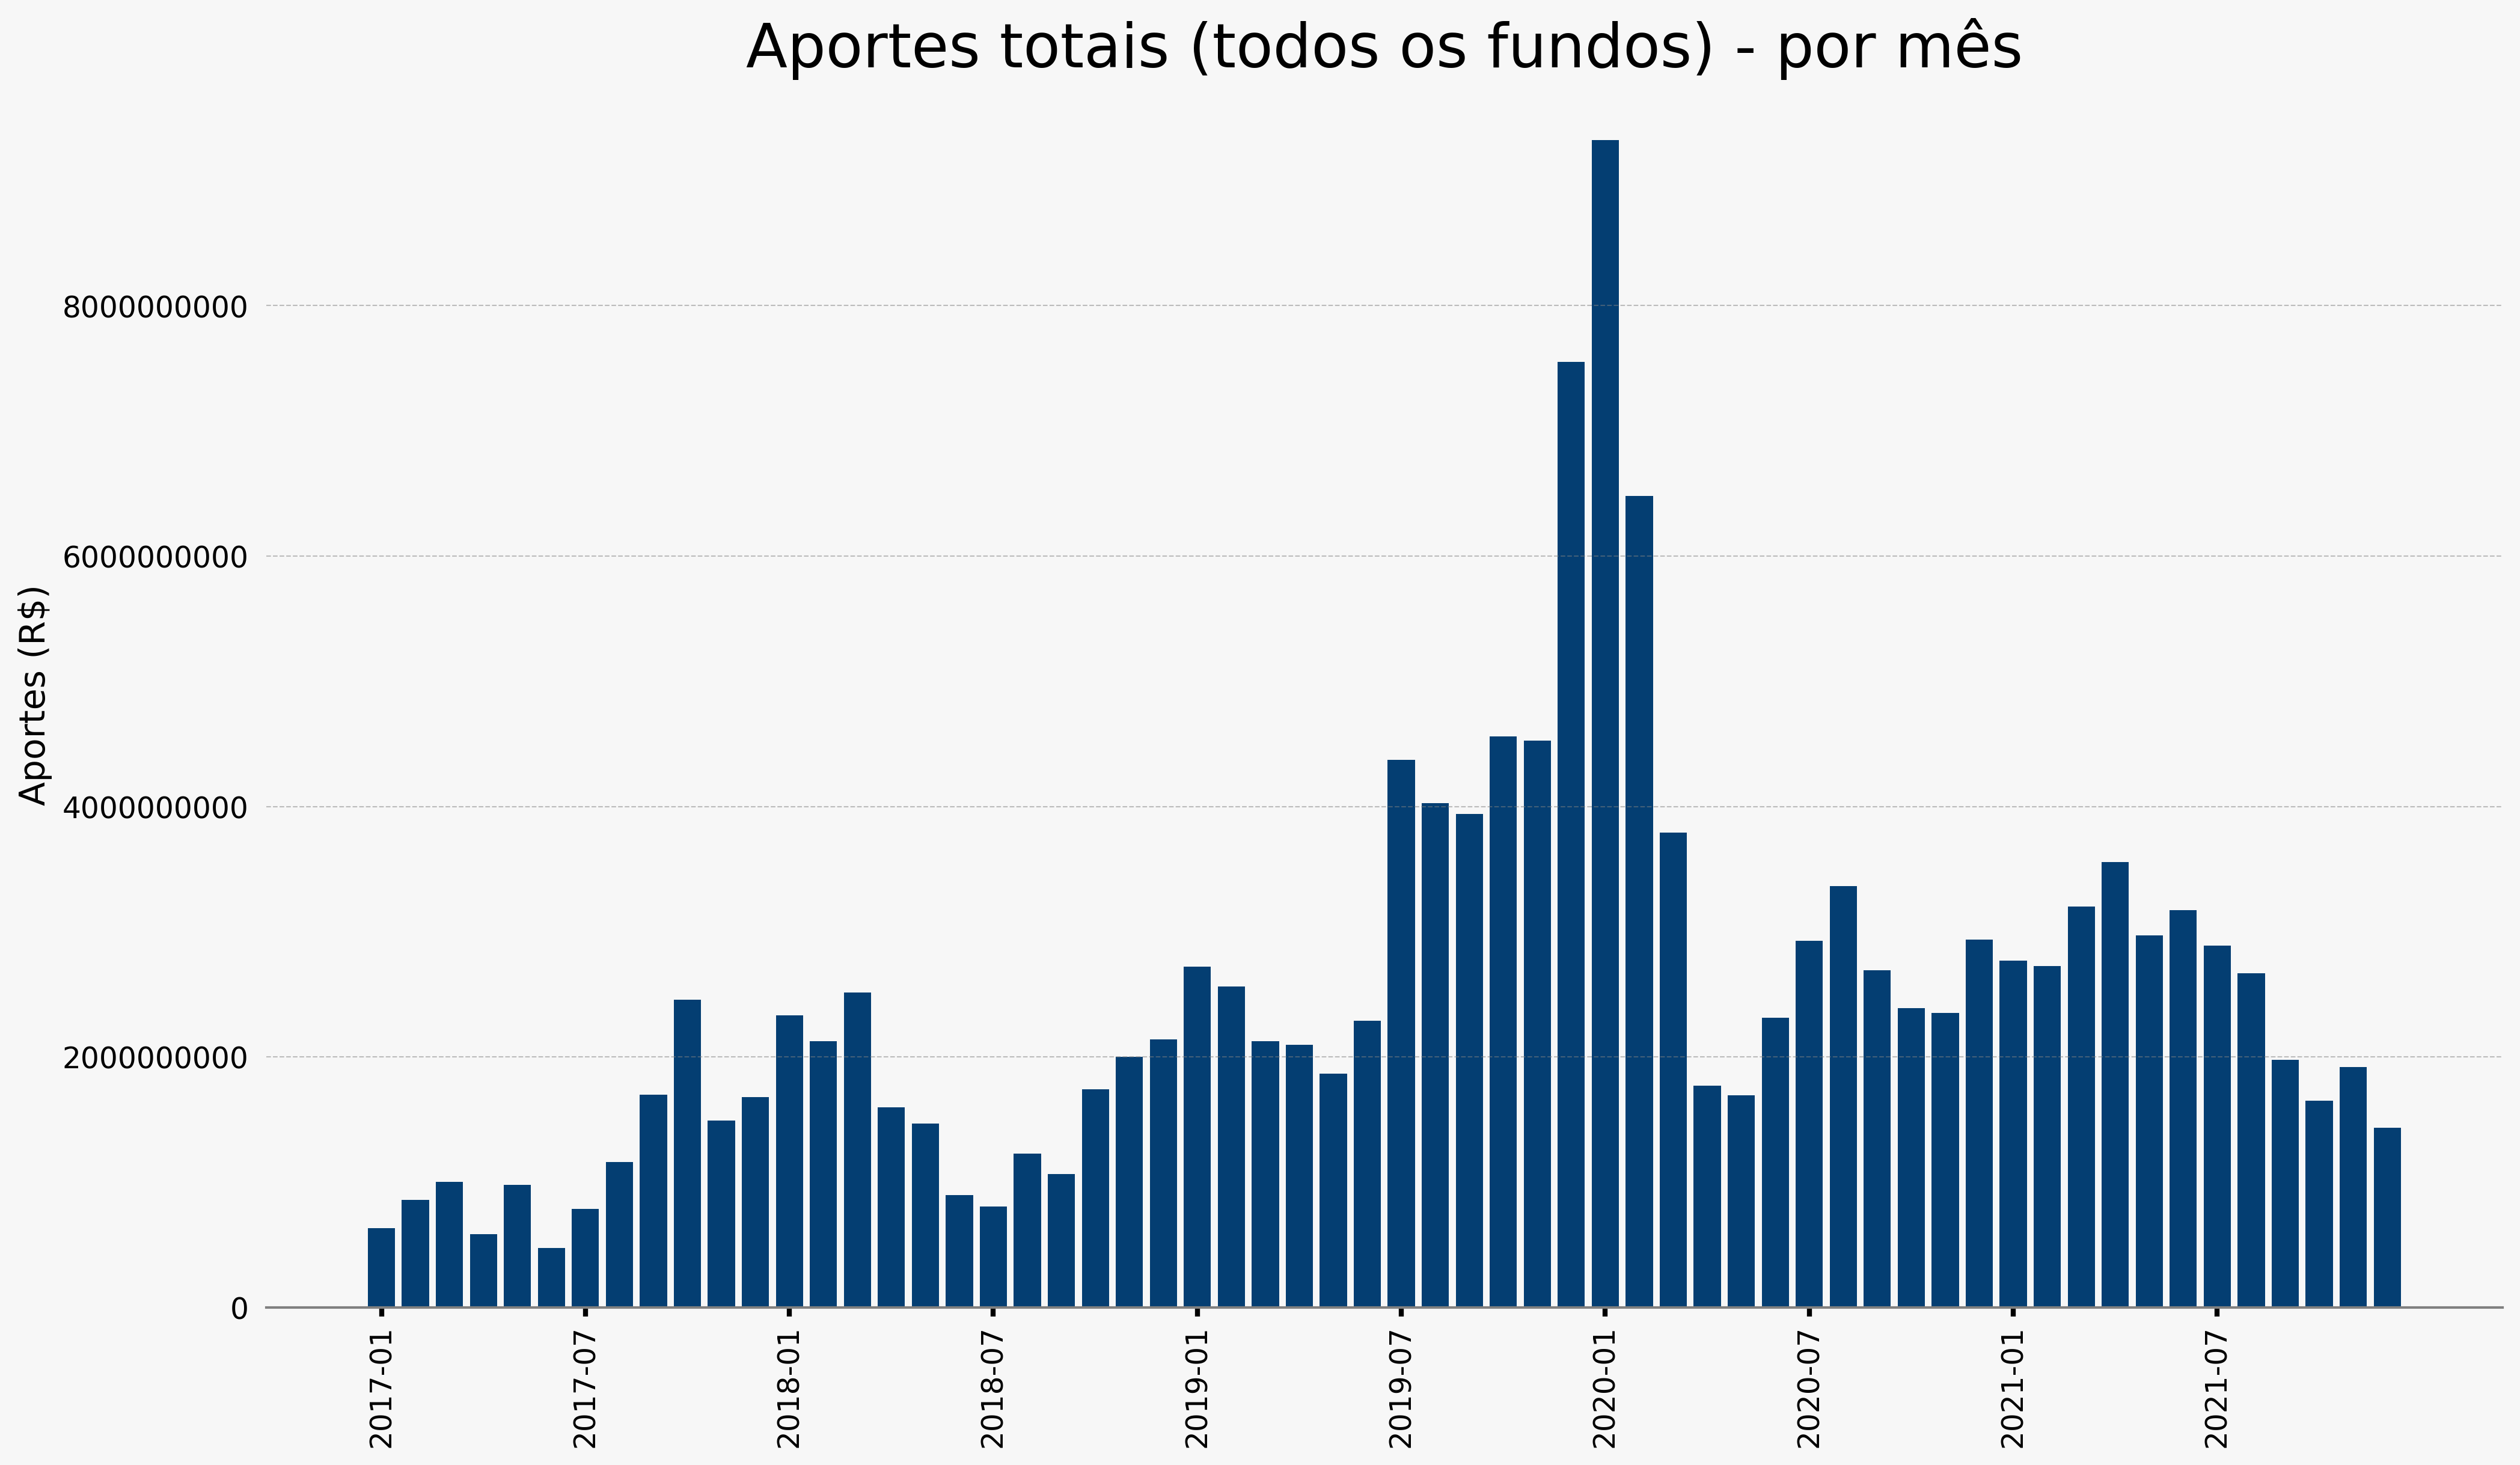

In [143]:
plt.figure(figsize=(16, 9))

plt.bar(capt_somados["year-month"], capt_somados["Captacao_total"])
plt.xticks(rotation="vertical")
plt.title("Aportes totais (todos os fundos) - por mês")
plt.ylabel("Aportes (R$)")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xticks(capt_somados["year-month"][::6])

plt.show()

### 2.2 - Fundos com mais aportes no período analisado

In [144]:
capt_periodo_porfundo = (
    dados_capt
    .drop("year-month", axis=1)
    .sum(axis=0)
    .sort_values(ascending=False)
    .reset_index()
    .rename({0 : "Captacao_total"}, axis=1)
)

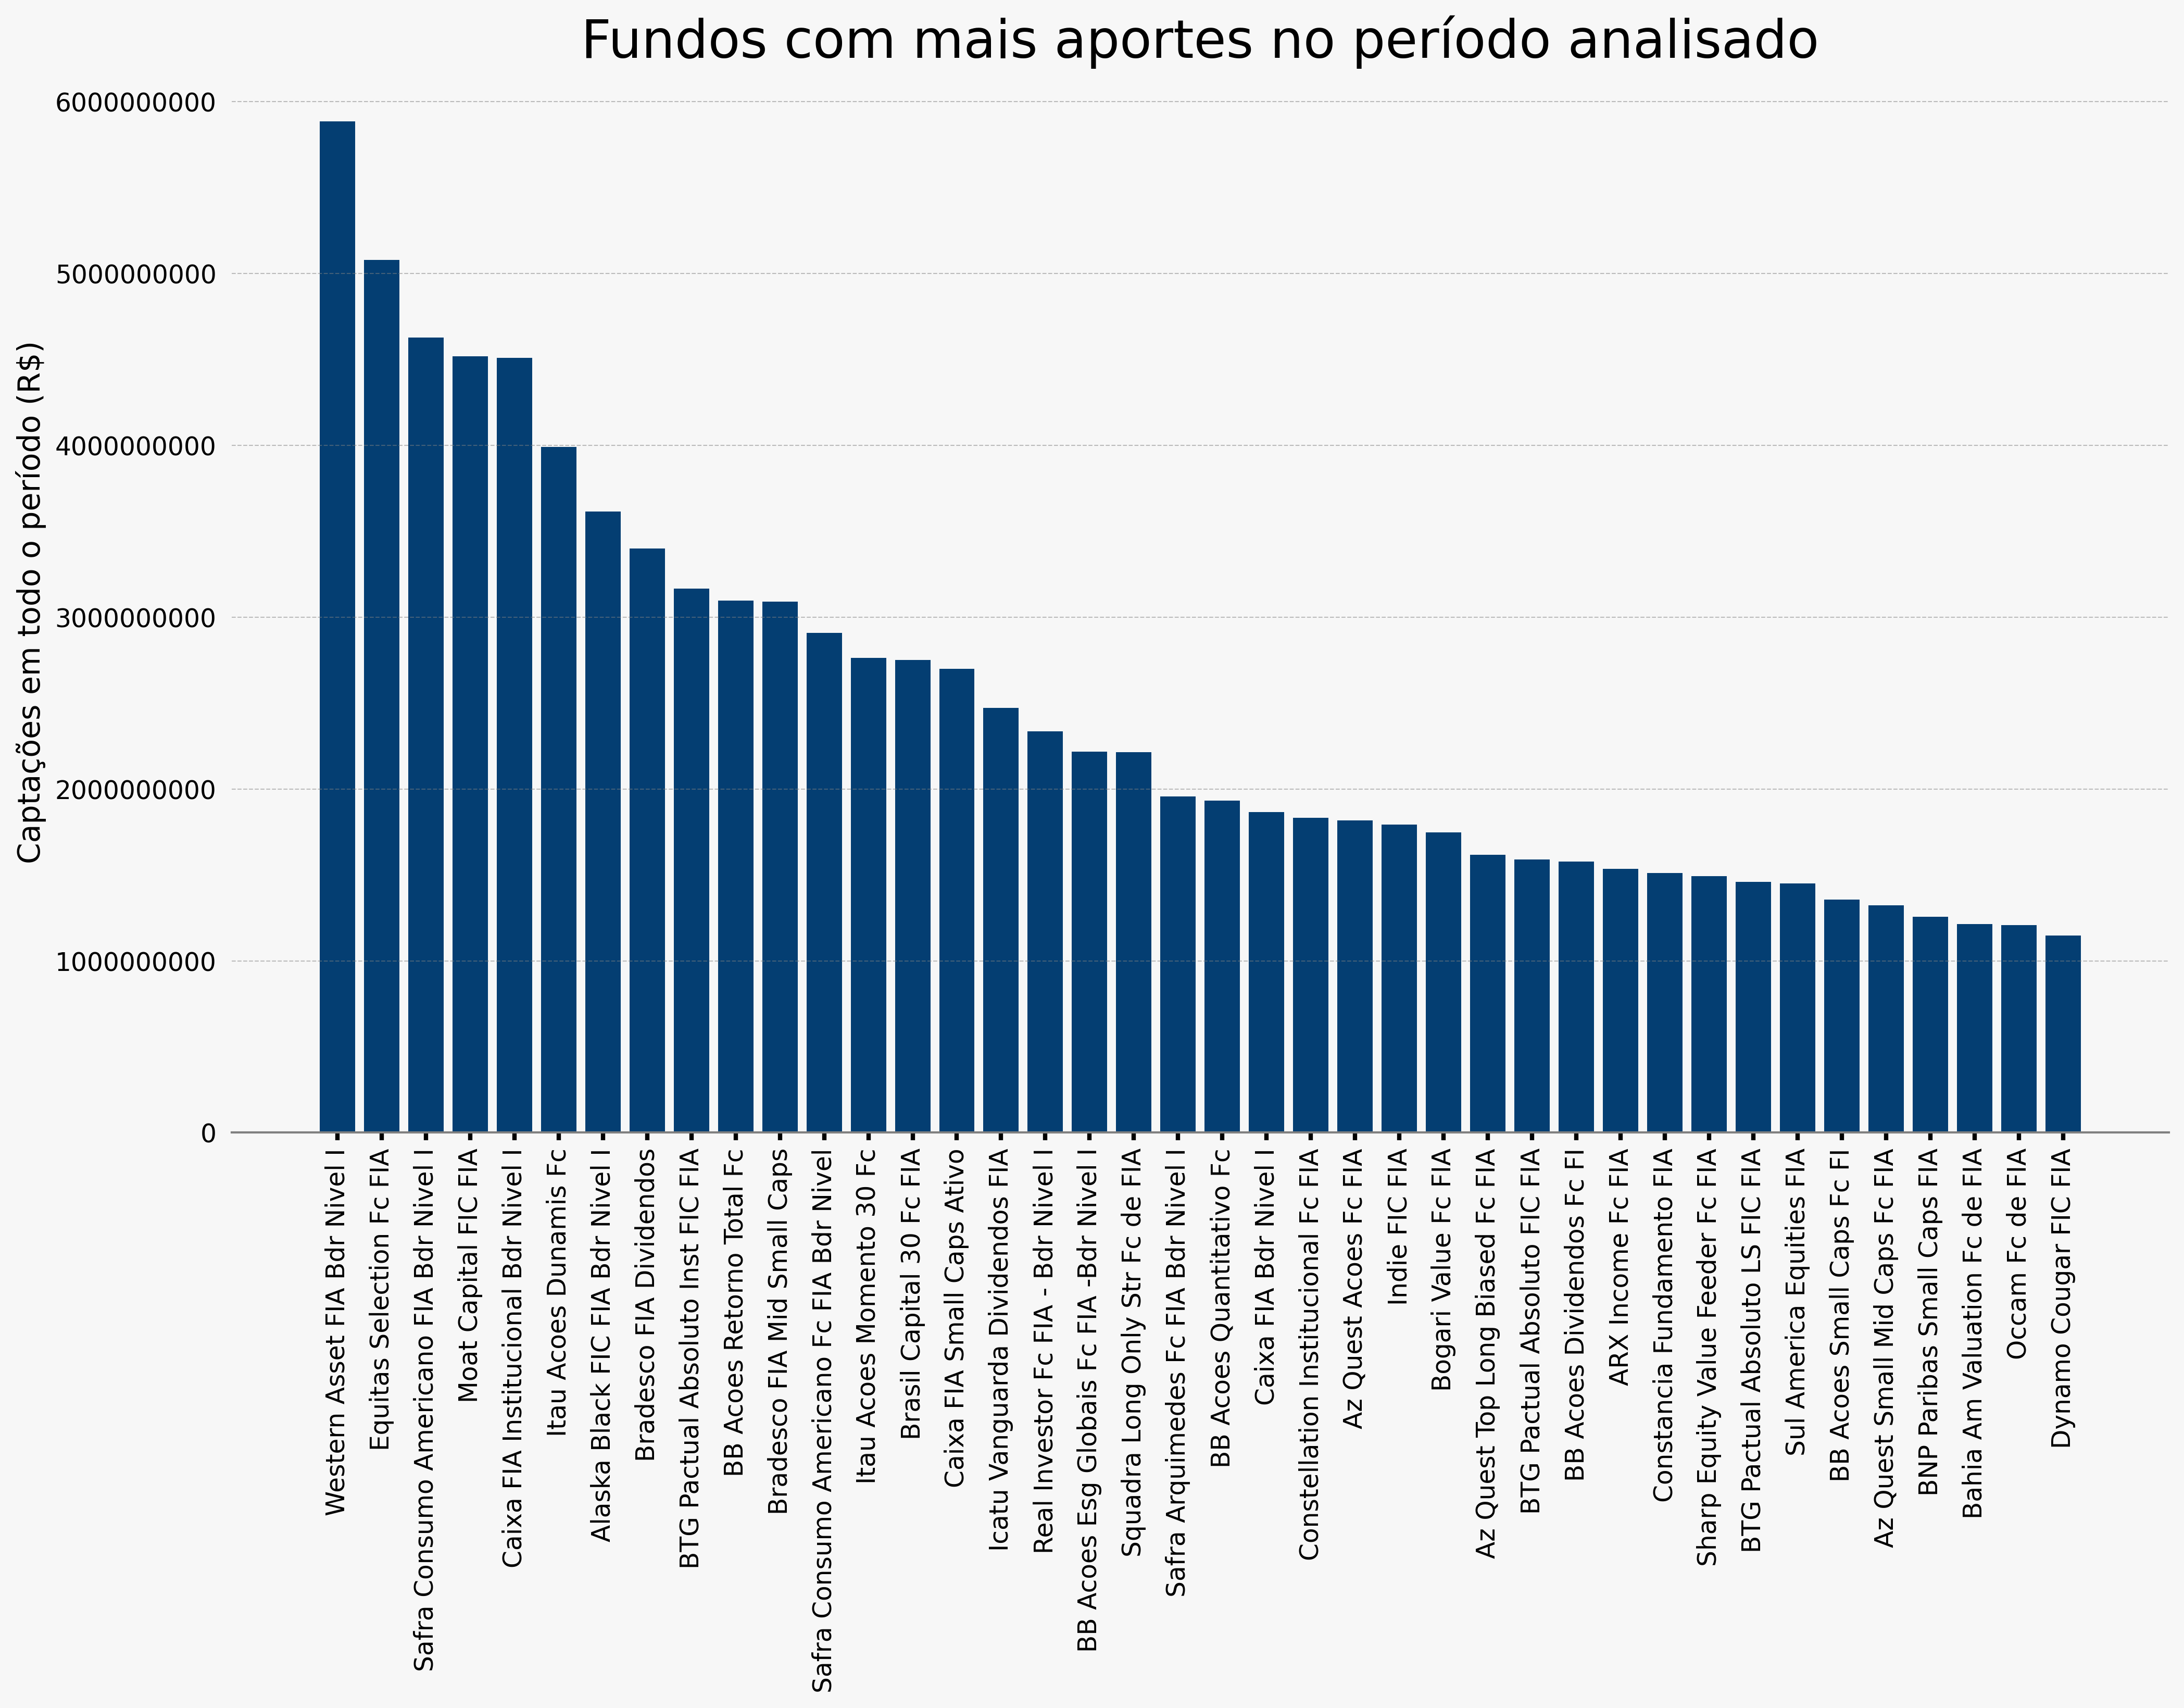

In [146]:
plt.figure(figsize=(16, 9))
plt.title("Fundos com mais aportes no período analisado")
plt.bar(capt_periodo_porfundo.iloc[:40, 0], capt_periodo_porfundo.iloc[:40, 1])
plt.xticks(rotation="vertical")
plt.ylabel("Captações em todo o período (R$)")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.show()